In [1]:
import pandas as pd
import os

# Path
processed_path = r"C:\Users\ruham\Downloads\financial inclusion forecasting system\Financial-inclusion-forecasting-system-week10\data\processed"
file_name = "ethiopia_fi_features.xlsx"

# Load dataset
df = pd.read_excel(os.path.join(processed_path, file_name))
df.head()


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year,month,quarter,value_norm
0,0,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN,2014.0,12.0,4.0,-0.348079
1,0,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2017.0,12.0,4.0,-0.348078
2,0,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2021.0,12.0,4.0,-0.348078
3,0,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021.0,12.0,4.0,-0.348078
4,0,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021.0,12.0,4.0,-0.348078


In [2]:
target_indicator = 'ACC_OWNERSHIP'  # Replace with the indicator you want
df_target = df[df['indicator_code'] == target_indicator].sort_values('observation_date')
df_target = df_target[['observation_date', 'value_numeric']].dropna()
df_target.set_index('observation_date', inplace=True)
df_target.head()


,value_numeric
observation_date,
2014-12-31,22.0
2017-12-31,35.0
2021-12-31,46.0
2021-12-31,56.0
2021-12-31,36.0


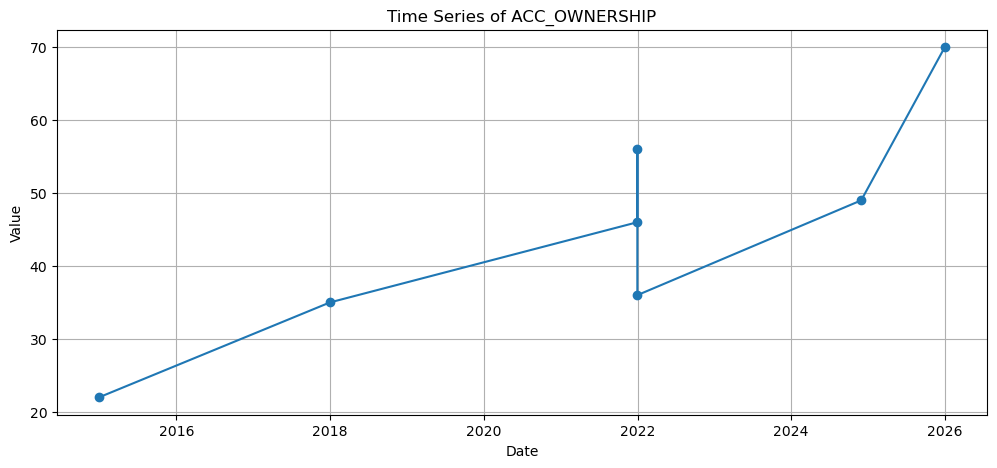

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_target.index, df_target['value_numeric'], marker='o')
plt.title(f'Time Series of {target_indicator}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [4]:
split_ratio = 0.8
split_index = int(len(df_target) * split_ratio)
train = df_target.iloc[:split_index]
test = df_target.iloc[split_index:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (5, 1)
Test shape: (2, 1)


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA
model = ARIMA(train['value_numeric'], order=(1,1,1))  # p,d,q can be tuned
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=len(test))


                               SARIMAX Results                                
Dep. Variable:          value_numeric   No. Observations:                    5
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -16.222
Date:                Tue, 03 Feb 2026   AIC                             38.444
Time:                        16:43:59   BIC                             36.603
Sample:                             0   HQIC                            34.404
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0349     25.123     -0.001      0.999     -49.275      49.205
ma.L1          0.1988     22.165      0.009      0.993     -43.244      43.642
sigma2       193.7091   1922.253      0.101      0.9

c:\Users\ruham\miniconda3\envs\ethiopia-fi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ruham\miniconda3\envs\ethiopia-fi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ruham\miniconda3\envs\ethiopia-fi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ruham\miniconda3\envs\ethiopia-fi\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test['value_numeric'], forecast)
mae = mean_absolute_error(test['value_numeric'], forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 26.99, RMSE: 28.94


In [9]:
print("Test length:", len(test))
print("Forecast length:", len(forecast))


Test length: 2
Forecast length: 2


In [10]:
# Make sure test only has the rows you want to forecast
test_aligned = test.copy()

# Make sure forecast is a 1D array
forecast_values = forecast.values if hasattr(forecast, 'values') else forecast

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'observation_date': test_aligned.index,
    'actual': test_aligned['value_numeric'],
    'forecast': forecast_values
})

print(forecast_df)


                 observation_date  actual   forecast
observation_date                                    
2024-11-29             2024-11-29    49.0  32.451317
2025-12-31             2025-12-31    70.0  32.575249


In [11]:
forecast_df.to_excel(os.path.join(processed_path, f"{target_indicator}_forecast.xlsx"), index=False)
print("Forecast saved successfully!")


Forecast saved successfully!


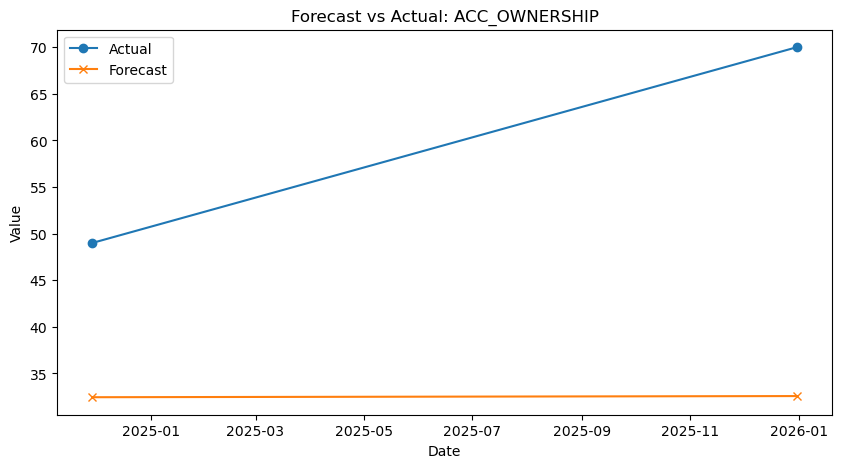

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(forecast_df['observation_date'], forecast_df['actual'], label='Actual', marker='o')
plt.plot(forecast_df['observation_date'], forecast_df['forecast'], label='Forecast', marker='x')
plt.title(f"Forecast vs Actual: {target_indicator}")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(forecast_df['actual'], forecast_df['forecast'])
mae = mean_absolute_error(forecast_df['actual'], forecast_df['forecast'])
print(f"MSE: {mse:.3f}, MAE: {mae:.3f}")


MSE: 837.235, MAE: 26.987
